In [ ]:
import pandas as pd

In [ ]:
import numpy as np


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
data=pd.read_csv("/content/car_price_prediction_.csv")

In [ ]:
data.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [ ]:
data.tail()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5
2499,2500,Toyota,2005,4.6,Diesel,Automatic,80978,Used,16594.14,RAV4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [ ]:
data.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


In [ ]:
data.drop(['Car ID'],axis=1) # REMOVES ENTIRE COLUMN NAME CAR ID


,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...
2495,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


In [ ]:
data=pd.get_dummies(data,drop_first=True)
data.head()


# CONVERT CATEGORIAL DATASET INTO THE UMERICAL DATASET


,Car ID,Year,Engine Size,Mileage,Price,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Mercedes,Brand_Tesla,...,Model_Model S,Model_Model X,Model_Model Y,Model_Mustang,Model_Prius,Model_Q5,Model_Q7,Model_RAV4,Model_X3,Model_X5
0,1,2016,2.3,114832,26613.92,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
1,2,2018,4.4,143190,14679.61,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,2013,4.5,181601,44402.61,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,2011,4.1,68682,86374.33,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,5,2009,2.6,223009,73577.10,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


**DEFINE FEATURES AND TARGET**

In [ ]:
X=data.drop('Price',axis=1)
y=data['Price']
#X=INPUT FEATURES------ALL EXCEPOT PRICE--- DATA USED FOR TRAINING
#Y=OUTPUT TARGET---- PRICE--- COLUMN IT WILL PREDICT


**SPLIT DATA**
 80% AND 20%

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape
y_test.shape
#o/p means that thw y test is 1 d arrat with 500 elements that is 20% of total data set  500 is 20% of 2500

(500,)

**ML MODEL**

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train) #model train sucessfully

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)
#predict price to predict data

In [ ]:
comparison=pd,pd.DataFrame({'Actual':y_test.values[:10],'predicted':y_pred[:10]})
print (comparison)

(<module 'pandas' from '/usr/local/lib/python3.12/dist-packages/pandas/__init__.py'>,      Actual     predicted
0  17494.90  55896.652319
1  75919.94  50814.202988
2  87474.10  53886.388520
3  13522.58  54120.356767
4  77070.57  52205.166072
5  40085.49  51519.081481
6  47196.40  49425.494103
7  58558.94  54294.048921
8  23029.74  53382.781059
9  32351.06  53173.114090)


**Evaluation of the model**

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print ("Model Evaluation Results")
print(f"Mean Absolute Error:{mae:.2f}")
print (f"Mean Square Error:{mse:.2f}")
print(f"R2 Score:{r2:.2f}")

Model Evaluation Results
Mean Absolute Error:23875.79
Mean Square Error:772832924.05
R2 Score:-0.02


**Visualisation**

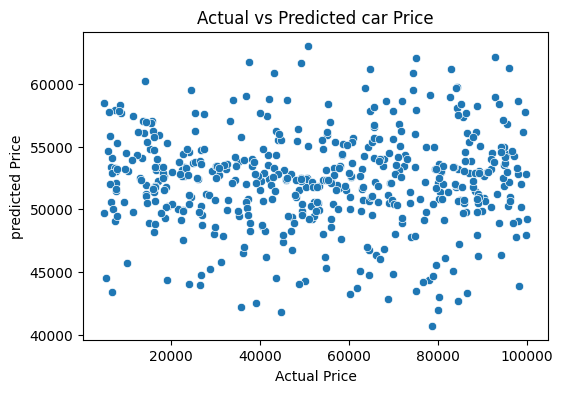

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual vs Predicted car Price")
plt.show()

**TO SAVE THE MODEL**

In [ ]:
import joblib

In [ ]:
joblib.dump(model,"car prediction.p")
print("\n model Saved As :Car Price Prediction model.p")


 model Saved As :Car Price Prediction model.p


Thankyou